In [1]:
import sys
sys.path.append('../..')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit.circuit.library import EfficientSU2
from qiskit_aer import AerSimulator 
from qiskit.utils import QuantumInstance
from qubap.qiskit.luciano.costfunc_barren_plateaus import global2local, test_hamiltonian_2, VQE_shift, paulistrings2hamiltonian 
from qubap.qiskit.luciano.variational_algorithms import VQE, energy_evaluation, classical_solver

In [3]:
molecule = np.load( 'molecule_BeH2_6.npy', allow_pickle=True )[0]
pauli_strings, coeffs = molecule['hamiltonian']
hamiltonian = paulistrings2hamiltonian( pauli_strings, coeffs )
num_qubits = hamiltonian.num_qubits
hamiltonian

PauliSumOp(SparsePauliOp(['IIIIII', 'ZIIIII', 'IZIIII', 'ZZIIII', 'IIZIII', 'ZIZIII', 'IZZIII', 'ZZZIII', 'IIIZII', 'ZIIZII', 'ZZIZII', 'IIZZII', 'IZZZII', 'IIIIZI', 'IIIZZI', 'ZIIZZI', 'ZZIZZI', 'IIZZZI', 'IZZZZI', 'IIIIIZ', 'ZIIIIZ', 'ZZIIIZ', 'IIZIIZ', 'IZZIIZ', 'IIIZIZ', 'IIIIZZ', 'ZIIIZZ', 'ZZIIZZ', 'IIZIZZ', 'IZZIZZ', 'IIIZZZ', 'XXXIII', 'YYXIII', 'YXYIII', 'XYYIII', 'XXXZII', 'YXYZII', 'XXXZZI', 'YXYZZI', 'XXXIIZ', 'YXYIIZ', 'XXXIZZ', 'YXYIZZ', 'XIIXII', 'XZIXII', 'XIIXZI', 'XZIXZI', 'ZXXXII', 'IYYXII', 'ZXXXZI', 'IYYXZI', 'IXIIXI', 'ZXZIXI', 'IXIZXZ', 'ZXZZXZ', 'YYIYYI', 'XXZYYI', 'YYIXXZ', 'XXZXXZ', 'IIXYYI', 'IZXYYI', 'IIXXXZ', 'IZXXXZ', 'YYIIIX', 'XXZIIX', 'YYIIZX', 'XXZIZX', 'IIXIIX', 'IZXIIX', 'IIXIZX', 'IZXIZX', 'XIIZXX', 'XZIZXX', 'XIIIYY', 'XZIIYY', 'ZXXZXX', 'IYYZXX', 'ZXXIYY', 'IYYIYY', 'IIIXXX', 'ZIIXXX', 'ZZIXXX', 'IIZXXX', 'IZZXXX', 'IIIYYX', 'IIIYXY', 'ZIIYXY', 'ZZIYXY', 'IIZYXY', 'IZZYXY', 'IIIXYY', 'XXXXXX', 'YXYXXX', 'XXXYXY', 'YXYYXY'],
              coeffs=[-

In [4]:
exact_energy = classical_solver( hamiltonian ).eigenvalue
exact_energy

-3.91117316918219

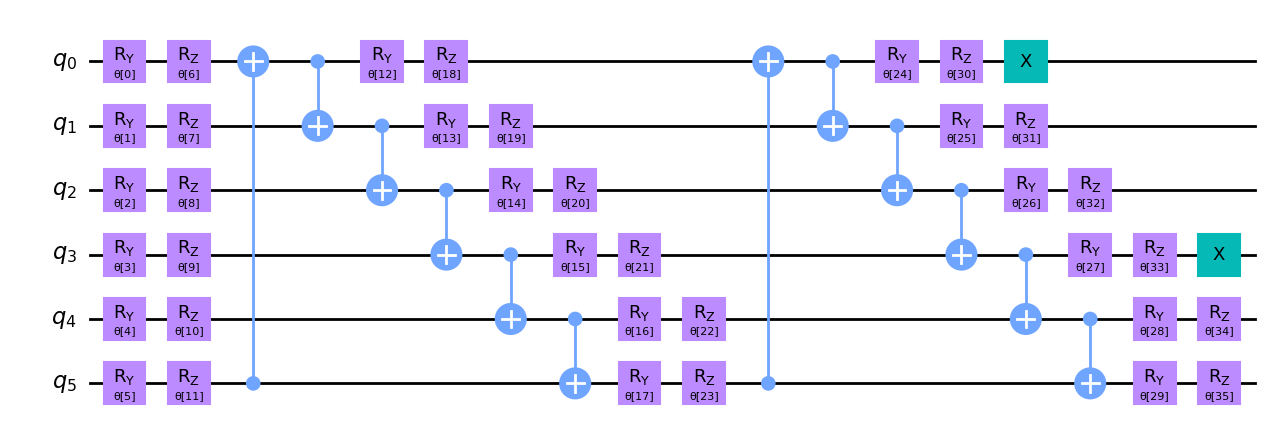

In [5]:
reps   = 2
ansatz = EfficientSU2( num_qubits, ['ry','rz'], 'circular', reps ).decompose()
ansatz.compose( QuantumCircuit.from_qasm_str( molecule['initial_state']), inplace=True )
ansatz.draw('mpl') 

In [6]:
num_iters = 100
npars = ansatz.num_parameters
# pars  = np.random.randn( npars ) * np.pi
pars  = np.zeros( npars ) + 0.01
quantum_instance = QuantumInstance( AerSimulator() , shots = 2**10 )

In [7]:
energy_evaluation( hamiltonian, ansatz, pars, AerSimulator(method='statevector'))

-3.8971868975889965

In [14]:
results_global = VQE( hamiltonian, ansatz, pars, num_iters, quantum_instance, iter_start=250 )
data_global    = [ energy_evaluation( hamiltonian, ansatz, x, AerSimulator(method='statevector') ) for x in results_global['x'] ]

In [15]:
results_shift = VQE_shift( hamiltonian, ansatz, pars, num_iters, num_iters//3, quantum_instance, iter_start=250 ) 
data_shift    = [ energy_evaluation( hamiltonian, ansatz, x, AerSimulator(method='statevector') ) for x in results_shift ] 

In [19]:
from qiskit import QuantumCircuit
import qiskit.opflow as of

In [18]:
qc = QuantumCircuit(1,1)
qc.h(0)
qc.measure(0,0)

In [20]:
of.StateFn( qc )

TypeError: CircuitOp does not support QuantumCircuits with ClassicalRegisters.

In [21]:
qc.num_clbits 

1

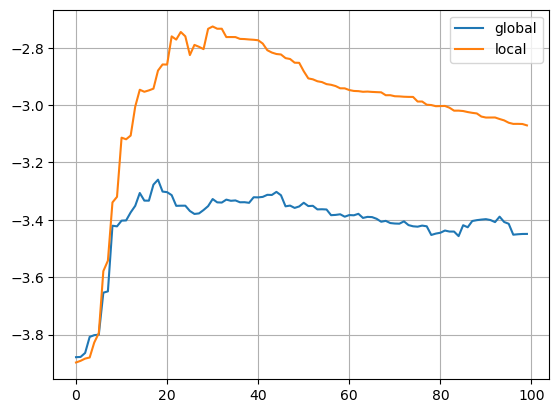

In [16]:
plt.plot( data_global )
plt.plot( data_shift )
plt.grid()
plt.legend(['global','local'])